## Northwest Corner: Speed in sigma range & SST

In [1]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib

from dask.distributed import Client, wait
import dask

import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)

In [2]:
#client = Client(n_workers=1, threads_per_worker=8, memory_limit=12e9)
#client

## Data

In [3]:
## VIKING20X.L46-KKG36107B (VJs)
path_VJs = '/sfs/fs1/work-geomar/smomw379/DATA/VIKING20X.L46-KKG36107B/'
ds_VJs = xr.open_mfdataset(path_VJs + '1_VIKING20X.L46-KKG36107B_10yr_*_speed_on_sig0.nc.interp', combine='by_coords').mean('time_counter')

path_VJs_T = '/sfs/fs1/work-geomar3/smomw091/SDIR/VIKING20X.L46/VIKING20X.L46-KKG36107B-S/1y/'
filelist = [path_VJs_T + f'1_VIKING20X.L46-KKG36107B_1y_{yr}0101_{yr}1231_grid_T.nc' for yr in np.arange(1990,2010)]
ds_VJs_T = xr.open_mfdataset(filelist, combine='by_coords')

In [4]:
## ORCA025.L46-KFS001-V (OJ)
path_OJ = '/sfs/fs1/work-geomar/smomw379/DATA/ORCA025.L46-KFS001-V/'
ds_OJ = xr.open_mfdataset(path_OJ + 'ORCA025.L46-KFS001-V_10yr_*_speed_on_sig0.nc.interp', combine='by_coords').mean('time_counter')

path_OJ_T =  '/sfs/fs1/work-geomar3/smomw091/SDIR/ORCA025.L46/ORCA025.L46-KFS001-V/1y/'
filelist = [path_OJ_T + f'ORCA025.L46-KFS001-V_1y_{yr}0101_{yr}1231_grid_T.nc' for yr in np.arange(1990,2010)]
ds_OJ_T = xr.open_mfdataset(filelist, combine='by_coords')

In [5]:
## HadiSST
path_HadiSST = '/sfs/fs1/work-geomar/smomw379/Publications/Biastoch2020/'
dsHad = xr.open_dataset(path_HadiSST + 'HadISST_sst.nc')

## Mean speed in density range

In [6]:
## VJs
print(f'Density range (VJs): {ds_VJs.deptht[46].values :.2f} - {ds_VJs.deptht[49].values :.2f} ')

VJs_speed = ds_VJs.voocecur.isel(deptht=range(46,50), x=range(300,1400), y=range(1400,2050)).mean('deptht').compute()

lon_VJs = ds_VJs.nav_lon.isel(x=range(300,1400), y=range(1400,2050))
lat_VJs = ds_VJs.nav_lat.isel(x=range(300,1400), y=range(1400,2050))

Density range (VJs): 27.65 - 27.95 


/sfs/fs1/work-geomar/smomw379/miniconda3/envs/py3_std/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/sfs/fs1/work-geomar/smomw379/miniconda3/envs/py3_std/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [7]:
## OJ
print(f'Density range (OJ): {ds_OJ.deptht[46].values :.2f} - {ds_OJ.deptht[49].values :.2f} ')

OJ_speed = ds_OJ.voocecur.isel(deptht=range(46,50), x=range(750,1050), y=range(600,850)).mean('deptht').compute()

lon_OJ = ds_OJ.nav_lon.isel(x=range(750,1050), y=range(600,850))
lat_OJ = ds_OJ.nav_lat.isel(x=range(750,1050), y=range(600,850))

Density range (OJ): 27.65 - 27.95 


/sfs/fs1/work-geomar/smomw379/miniconda3/envs/py3_std/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: divide by zero encountered in true_divide
  x = np.divide(x1, x2, out)
/sfs/fs1/work-geomar/smomw379/miniconda3/envs/py3_std/lib/python3.7/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


## SST 

In [8]:
## VJs
## use subregion to reduce computing time
SST_VJs = ds_VJs_T.sosstsst.isel(x=range(300,1400), y=range(1400,2050)).mean('time_counter').compute()

In [9]:
## OJ
## use subregion to reduce computing time
SST_OJ = ds_OJ_T.sosstsst.isel(x=range(750,1050), y=range(600,850)).mean('time_counter').compute()

In [10]:
## HadiSST
## select the same time range as for VIKING20X
SST_HadiSST = dsHad.sst.isel(time=range(1440,1680)).mean('time').compute()

/sfs/fs1/work-geomar/smomw379/miniconda3/envs/py3_std/lib/python3.7/site-packages/xarray/core/nanops.py:142: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis=axis, dtype=dtype)


## Plotting

In [11]:
land = cfeature.GSHHSFeature(scale='intermediate', edgecolor='k', linewidth=0.8, facecolor='grey')

In [12]:
colorlist = (
    (0.01 * 94.902, 0.01 * 94.510, 0.01 * 94.902),
    (0.01 * 94.510, 0.01 * 88.627, 0.01 * 94.118),
    (0.01 * 69.804, 0.01 * 62.745, 0.01 * 80.392),
    (0.01 * 50.196, 0.01 * 65.098, 0.01 * 80.784),
    (0.01 * 40.392, 0.01 * 75.686, 0.01 * 60.784),
    (0.01 * 33.725, 0.01 * 69.412, 0.01 * 20.000),
    (0.01 * 80.000, 0.01 * 90.588, 0.01 * 4.314),
    (0.01 * 98.039, 0.01 * 96.078, 0.01 * 9.804),
    (0.01 * 97.255, 0.01 * 50.980, 0.01 * 6.667),
    (0.01 * 98.039, 0.01 *  7.059, 0.01 * 4.706),
    (0.01 * 59.608, 0.01 *  5.882, 0.01 * 3.137)
    )
cm = matplotlib.colors.LinearSegmentedColormap.from_list('DIF', colorlist, N = 255)

In [13]:
levels = np.concatenate([np.arange(0,10.1,0.25), np.arange(11,21,1), np.arange(25,61,5)])

norm = matplotlib.colors.BoundaryNorm(levels, 255)

Text(0.0, 1.0, '(b) ORCA025-JRA')

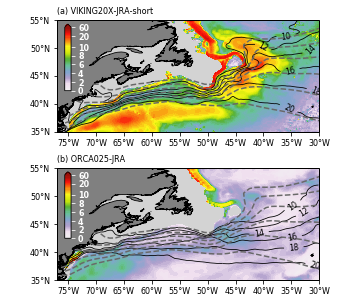

In [14]:
fig = plt.figure(figsize=(4.7,5))

############################# VIKING20X #############################
ax=fig.add_subplot(211, projection=ccrs.PlateCarree())
ax.set_extent([-77,-30,35,55], crs=ccrs.PlateCarree())
ax.add_feature(land)

ax.contourf(lon_VJs, lat_VJs, np.zeros(lon_VJs.shape), colors='lightgrey')
ct = ax.contourf(lon_VJs, lat_VJs, VJs_speed*100, cmap=cm, levels=levels, norm=norm, extend='max')

## colorbar
ax_cb=fig.add_axes([-0.022,0.667,0.2,0.185], frameon = False); 
ax_cb.set_xticks([]); ax_cb.set_yticks([])
ticks = [0, 2, 4, 6, 8, 10, 20, 60]
cb = plt.colorbar(ct, ax=ax_cb, aspect=10, ticks=ticks)
cb.ax.yaxis.set_tick_params(color='w')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w', fontweight='bold');

# SST contours
ax.contour(lon_VJs.isel(x=range(0,851)), lat_VJs.isel(x=range(0,851)), SST_VJs.isel(x=range(0,851)), 
           levels=np.arange(10,22,2), colors='k', linewidths=0.8)
ctsst = ax.contour(lon_VJs.isel(x=range(850,1080)), lat_VJs.isel(x=range(850,1080)), SST_VJs.isel(x=range(850,1080)),
                   levels=np.arange(10,22,2), colors='k', linewidths=0.8)
plt.clabel(ctsst, fmt='%i', fontsize=8)

ax.contour(dsHad.longitude, dsHad.latitude, SST_HadiSST, levels=np.arange(10,22,2), colors='dimgrey', linestyles='--')

## ticks 
ax.set_xticks(np.arange(-75,-25,5), crs = ccrs.PlateCarree())
ax.set_yticks(np.arange(35,60,5), crs = ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_title('(a) VIKING20X-JRA-short', loc='left', fontsize=8)

############################# ORCA025 #############################
ax1=fig.add_subplot(212, projection=ccrs.PlateCarree())
ax1.set_extent([-77,-30,35,55], crs=ccrs.PlateCarree())
ax1.add_feature(land)

ax1.contourf(lon_OJ, lat_OJ, np.zeros(lon_OJ.shape), colors='lightgrey')
ct = ax1.contourf(lon_OJ, lat_OJ, OJ_speed*100, cmap=cm, levels=levels, norm=norm, extend='max')

## colorbar
ax1_cb=fig.add_axes([-0.022,0.257,0.2,0.185], frameon = False); 
ax1_cb.set_xticks([]); ax1_cb.set_yticks([])
ticks = [0, 2, 4, 6, 8, 10, 20, 60]
cb = plt.colorbar(ct, ax=ax1_cb, aspect=10, ticks=ticks)
cb.ax.yaxis.set_tick_params(color='w')
plt.setp(plt.getp(cb.ax.axes, 'yticklabels'), color='w', fontweight='bold');

# SST contours
ax1.contour(lon_OJ.isel(x=range(0,211)), lat_OJ.isel(x=range(0,211)), 
                    SST_OJ.isel(x=range(0,211)), levels=np.arange(10,22,2), colors='k', linewidths=0.8)

ctsst = ax1.contour(lon_OJ.isel(x=range(210,280),y=range(50,190)), lat_OJ.isel(x=range(210,280),y=range(50,190)), 
                    SST_OJ.isel(x=range(210,280),y=range(50,190)), levels=np.arange(10,22,2), colors='k',
                   linewidths=0.8)
plt.clabel(ctsst, fmt='%i', fontsize=8)

ax1.contour(dsHad.longitude, dsHad.latitude, SST_HadiSST, levels=np.arange(10,22,2), colors='dimgrey', linestyles='--')

## ticks 
ax1.set_xticks(np.arange(-75,-25,5), crs = ccrs.PlateCarree())
ax1.set_yticks(np.arange(35,60,5), crs = ccrs.PlateCarree())
lon_formatter = LongitudeFormatter()
lat_formatter = LatitudeFormatter()
ax1.xaxis.set_major_formatter(lon_formatter)
ax1.yaxis.set_major_formatter(lat_formatter)

ax1.set_title('(b) ORCA025-JRA', loc='left', fontsize=8)

#plt.savefig('figure12.png', dpi=150)

## Save data

In [15]:
lat = lat_OJ.rename({'x':'xOJ', 'y':'yOJ'}).rename({'nav_latOJ'})
lon = lon_OJ.rename({'x':'xOJ', 'y':'yOJ'}).rename({'nav_lonOJ'})

SST = SST_OJ.rename({'x':'xOJ', 'y':'yOJ','nav_lon':'nav_lonOJ', 'nav_lat':'nav_latOJ'})

SST.attrs['standard_name'] = "sea_surface_temperature" ;
SST.attrs['long_name'] = "sea surface temperature" ;
SST.attrs['units'] = "degC" ;

OJ_speed = OJ_speed.rename({'x':'xOJ', 'y':'yOJ'})
OJ_speed.attrs['long_name'] = 'Average speed in density range 27.65 - 27.95 kg/m^3'
OJ_speed.attrs['units'] = 'm/s'

In [16]:
## save data
latV = lat_VJs.rename({'x':'xVJs', 'y':'yVJs'}).rename({'nav_latVJ'})
lonV = lon_VJs.rename({'x':'xVJs', 'y':'yVJs'}).rename({'nav_latVJ'})

SSTV = SST_VJs.rename({'x':'xVJs', 'y':'yVJs','nav_lon':'nav_lonVJs', 'nav_lat':'nav_latVJs'})
SSTV.attrs['standard_name'] = "sea_surface_temperature" ;
SSTV.attrs['long_name'] = "sea surface temperature" ;
SSTV.attrs['units'] = "degC" ;

VJs_speed = VJs_speed.rename({'x':'xVJs', 'y':'yVJs'})
VJs_speed.attrs['long_name'] = 'Average speed in density range 27.65 - 27.95 kg/m^3'
VJs_speed.attrs['units'] = 'm/s'

In [20]:
dsout = xr.Dataset(data_vars = {'sosstsstVJs':SSTV,
                                'sosstsstOJ':SST,
                                'voocecurVJs': VJs_speed,
                                'voocecurOJ': OJ_speed,
                                'nav_latVJs':latV, 
                                'nav_lonVJs':lonV,
                                'nav_latOJ':lat, 
                                'nav_lonOJ':lon,
                               })

dsout.attrs['title'] = 'Mean (1990-2009) Sea Surface Temperature and speed in density range'
dsout.attrs['institution'] = 'GEOMAR Helmholtz Centre for Ocean Research Kiel'
dsout.attrs['creator_name'] = 'Tobias Schulzki'
dsout.attrs['creator_email'] = 'tschulzki@geomar.de'
dsout.attrs['creator_url'] = 'orcid.org/0000-0002-3480-8492'
dsout.attrs['license'] = 'CC BY 4.0'
dsout.attrs['keywords'] = 'SST, temperature, speed, numerical model'
#dsout.attrs['summary'] = 'Created in python'

outpath='/gxfs_work1/geomar/smomw379/Publications/Biastoch2020/DATA/'
dsout.to_netcdf(outpath + 'data_figure12.nc')